In [1]:
library(Seurat)
library(BisqueRNA)
library(fastSave)
library(pbmcapply)


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject

Loading required package: parallel



In [2]:
ref_seurat<-readRDS.lbzip2('~/scRNA_Seq_data/PBMC/Stephenson_seurat.rdsFS',n.cores = 200)
bulk.mtx<- readRDS("~/ReCIDE/应用_前二_新_inter/SLE/bulkdata/GSE50772_exprs.rds")
bulk.mtx<-as.matrix(bulk.mtx)
bulk.eset <- Biobase::ExpressionSet(assayData = bulk.mtx)

In [3]:
###########################
kk<-as.data.frame(ref_seurat@assays[["RNA"]]@counts)
kksum<-as.data.frame(apply(kk, 2, sum))
all(kksum>0)
kksum<-subset(kksum,kksum[,1]>0,)
kksum<-as.data.frame(kksum)
ref_seurat<-ref_seurat[,row.names(kksum)]
rm(kksum)
gc()

sample.ids <- colnames(ref_seurat)
individual.labels<-ref_seurat@meta.data['patient_id']
cell.type.labels<-ref_seurat@meta.data['true']

sc.pheno <- data.frame(check.names=F, check.rows=F,
                       stringsAsFactors=F,
                       row.names=sample.ids,
                       SubjectName=individual.labels,
                       cellType=cell.type.labels)

sc.meta <- data.frame(labelDescription=c("SubjectName",
                                         "cellType"),
                      row.names=c("SubjectName",
                                  "cellType"))
sc.pdata <- new("AnnotatedDataFrame",
                data=sc.pheno,
                varMetadata=sc.meta)

sc.eset <- Biobase::ExpressionSet(assayData=as.matrix(ref_seurat@assays$RNA@counts),
                                  phenoData=sc.pdata)
colnames(sc.eset@phenoData@data)<-c("SubjectName","cellType")
bisque_output <- BisqueRNA::ReferenceBasedDecomposition(bulk.eset, sc.eset, markers=NULL, use.overlap=FALSE)

# saveRDS(res,file = '~/SWORD/多参考集和单参考集比较测试/除SWORD外其他方法/bisque/TNBC_QEGAD_ref161529.rds')



Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 11.7 GiB”


[1] TRUE

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3464048,185.1,6435517,343.7,6435517,343.7
Vcells,1964388036,14987.1,5871002254,44792.2,6115555431,46658.0


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 11.7 GiB”
Decomposing into 28 cell types.

Using 14541 genes in both bulk and single-cell expression.

Converting single-cell counts to CPM and filtering zero variance genes.

Filtered 287 zero variance genes.

Converting bulk counts to CPM and filtering unexpressed genes.

Filtered 0 unexpressed genes.

Generating single-cell based reference from 97039 cells.


Inferring bulk transformation from single-cell alone.

Applying transformation to bulk samples and decomposing.



In [4]:
saveRDS(bisque_output,file='/home/lmh/ReCIDE/应用_前二_新_inter/SLE/bisque/bisque_output.rds')

In [5]:
bisque_output=readRDS('/home/lmh/ReCIDE/应用_前二_新_inter/SLE/bisque/bisque_output.rds')

In [6]:
prd_df <-as.data.frame(bisque_output[["bulk.props"]])
prd_df=prd_df[sort(row.names(prd_df)),sort(colnames(prd_df))]

In [7]:
saveRDS(prd_df,file='/home/lmh/ReCIDE/应用_前二_新_inter/SLE/bisque/bisque_prd_df.rds')

Warning message in readRDS("~/ReCIDE/应用_前二_新_inter/SLE/bulkdata/GSE50772_meta.rds"):
“input string 'Samples were hybridized to GeneChip® Human Genome U133 Plus 2.0 Arrays (Affymetrix, Inc.).  Arrays were washed and stained in the Affymetrix Fluidics station and scanned on a GeneChip® scanner 3000' cannot be translated from 'ANSI_X3.4-1968' to UTF-8, but is valid UTF-8”
Warning message in readRDS("~/ReCIDE/应用_前二_新_inter/SLE/bulkdata/GSE50772_meta.rds"):
“input string 'Samples were hybridized to GeneChip® Human Genome U133 Plus 2.0 Arrays (Affymetrix, Inc.).  Arrays were washed and stained in the Affymetrix Fluidics station and scanned on a GeneChip® scanner 3000' cannot be translated from 'ANSI_X3.4-1968' to UTF-8, but is valid UTF-8”
Warning message in readRDS("~/ReCIDE/应用_前二_新_inter/SLE/bulkdata/GSE50772_meta.rds"):
“input string 'Samples were hybridized to GeneChip® Human Genome U133 Plus 2.0 Arrays (Affymetrix, Inc.).  Arrays were washed and stained in the Affymetrix Fluidics statio

[1] TRUE

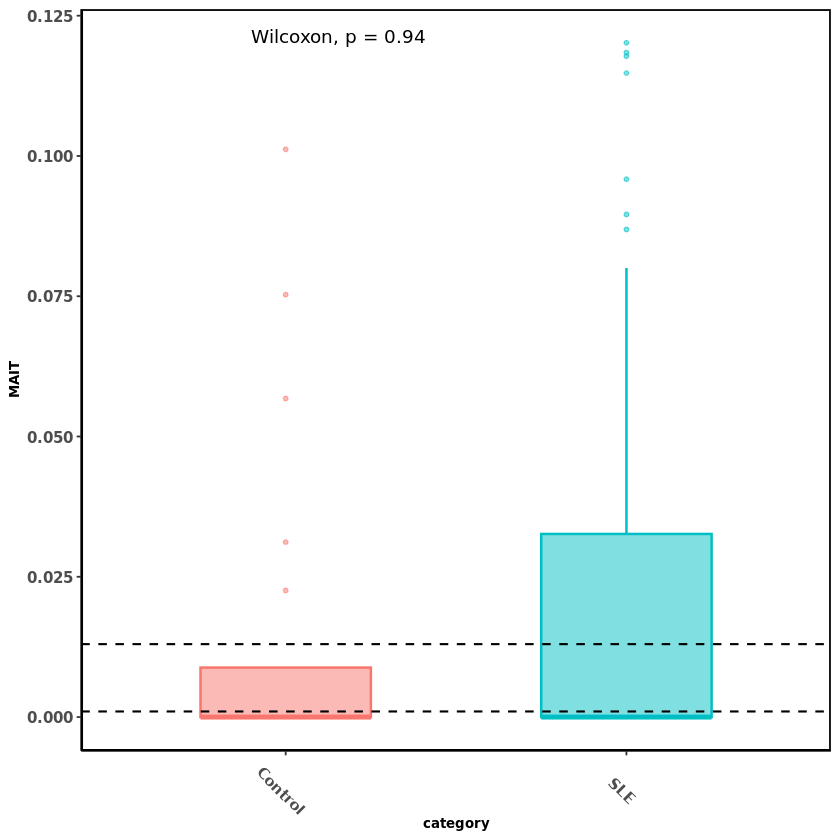

In [9]:
library(ggplot2)
library(ggpubr)

prd_df<- readRDS("/home/lmh/ReCIDE/应用_前二_新_inter/SLE/bisque/bisque_prd_df.rds")
prd_df=prd_df[,sort(colnames(prd_df))]

metadata<- readRDS("~/ReCIDE/应用_前二_新_inter/SLE/bulkdata/GSE50772_meta.rds")
metadata=metadata[sort(row.names(metadata)),]
# [1] "B_exhausted"           "B_immature"           
# [3] "B_naive"               "B_non_switched_memory"
# [5] "B_switched_memory"     "CD14_mono"            
# [7] "CD16_mono"             "CD4_CM"               
# [9] "CD4_EM"                "CD4_IL22"             
# [11] "CD4_Naive"             "CD4_Th"               
# [13] "CD8_EM"                "CD8_Naive"            
# [15] "CD8_TE"                "DC"                   
# [17] "HSC"                   "ILC"                  
# [19] "Lymph_prolif"          "MAIT"                 
# [21] "NK"                    "NKT"                  
# [23] "Plasma"                "Platelets"            
# [25] "RBC"                   "Treg"                 
# [27] "gdT"                   "pDC"                  
# [29] "category"             

all(row.names(metadata)==colnames(prd_df))

plot_data=as.data.frame(t(prd_df))

plot_data[,'category']=metadata[,'disease.status.ch1']

ggplot(plot_data, aes(x= category, y=MAIT,fill=category)) + 
  geom_boxplot(aes(color = category),#这里的fill如果不设就是空心的
               size = .7, alpha = .5, outlier.size = 1,
               position = position_dodge(width = 0.5), width = 0.5) +
  # position_dodge是箱子间距离  width是箱宽
  # geom_boxplot(data=subset(plot_data, methods %in% 'empty'), width = .5) +
  theme_classic() +
  theme(
    axis.text.x = element_text(size = 9, face = "bold", angle = -45),
    axis.text.y = element_text(size = 9, face = "bold"),
    # axis.text.x = element_blank(),
    # axis.text.y = element_blank(),
    axis.title = element_text(size = 8, face = "bold"),
    plot.title = element_text(size = 8, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
    panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),
    legend.position = 'none'
    # axis.title = element_text(size = 8)
  )+
  stat_compare_means()+
  geom_hline(yintercept = 0.001,col = 'Black',linewidth=0.6,linetype=2)+
  geom_hline(yintercept = 0.013,col = 'Black',linewidth=0.6,linetype=2)
